Introduction

In this final lesson on Regression, one of the basic classic ML techniques, we will take a look at Logistic Regression. You would use this technique to discover patterns to predict binary categories. Is this candy chocolate or not? Is this disease contagious or not? Will this customer choose this product or not?

In this lesson, you will learn:

    A new library for data visualization
    
    Techniques for logistic regression





Define the question

For our purposes, we will express this as a binary: 'Orange' or 'Not Orange'. There is also a 'striped' category in our dataset but there are few instances of it, so we will not use it. It disappears once we remove null values from the dataset, anyway.

About logistic regression

Logistic regression differs from linear regression, which you learned about previously, in a few important ways.

Binary classification

Logistic regression does not offer the same features as linear regression. The former offers a prediction about a binary category ("orange or not orange") whereas the latter is capable of predicting continual values, for example given the origin of a pumpkin and the time of harvest, how much its price will rise.

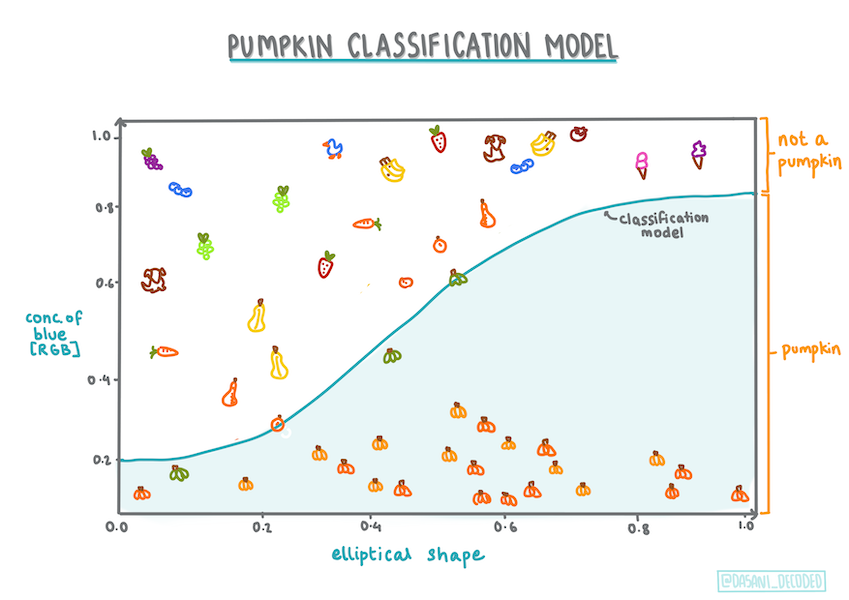

Other classifications

There are other types of logistic regression, including multinomial and ordinal


    Multinomial, which involves having more than one category - "Orange, White, and Striped".
    
    Ordinal, which involves ordered categories, useful if we wanted to order our outcomes logically, like our pumpkins that are ordered by a finite number of sizes (mini,sm,med,lg,xl,xxl).


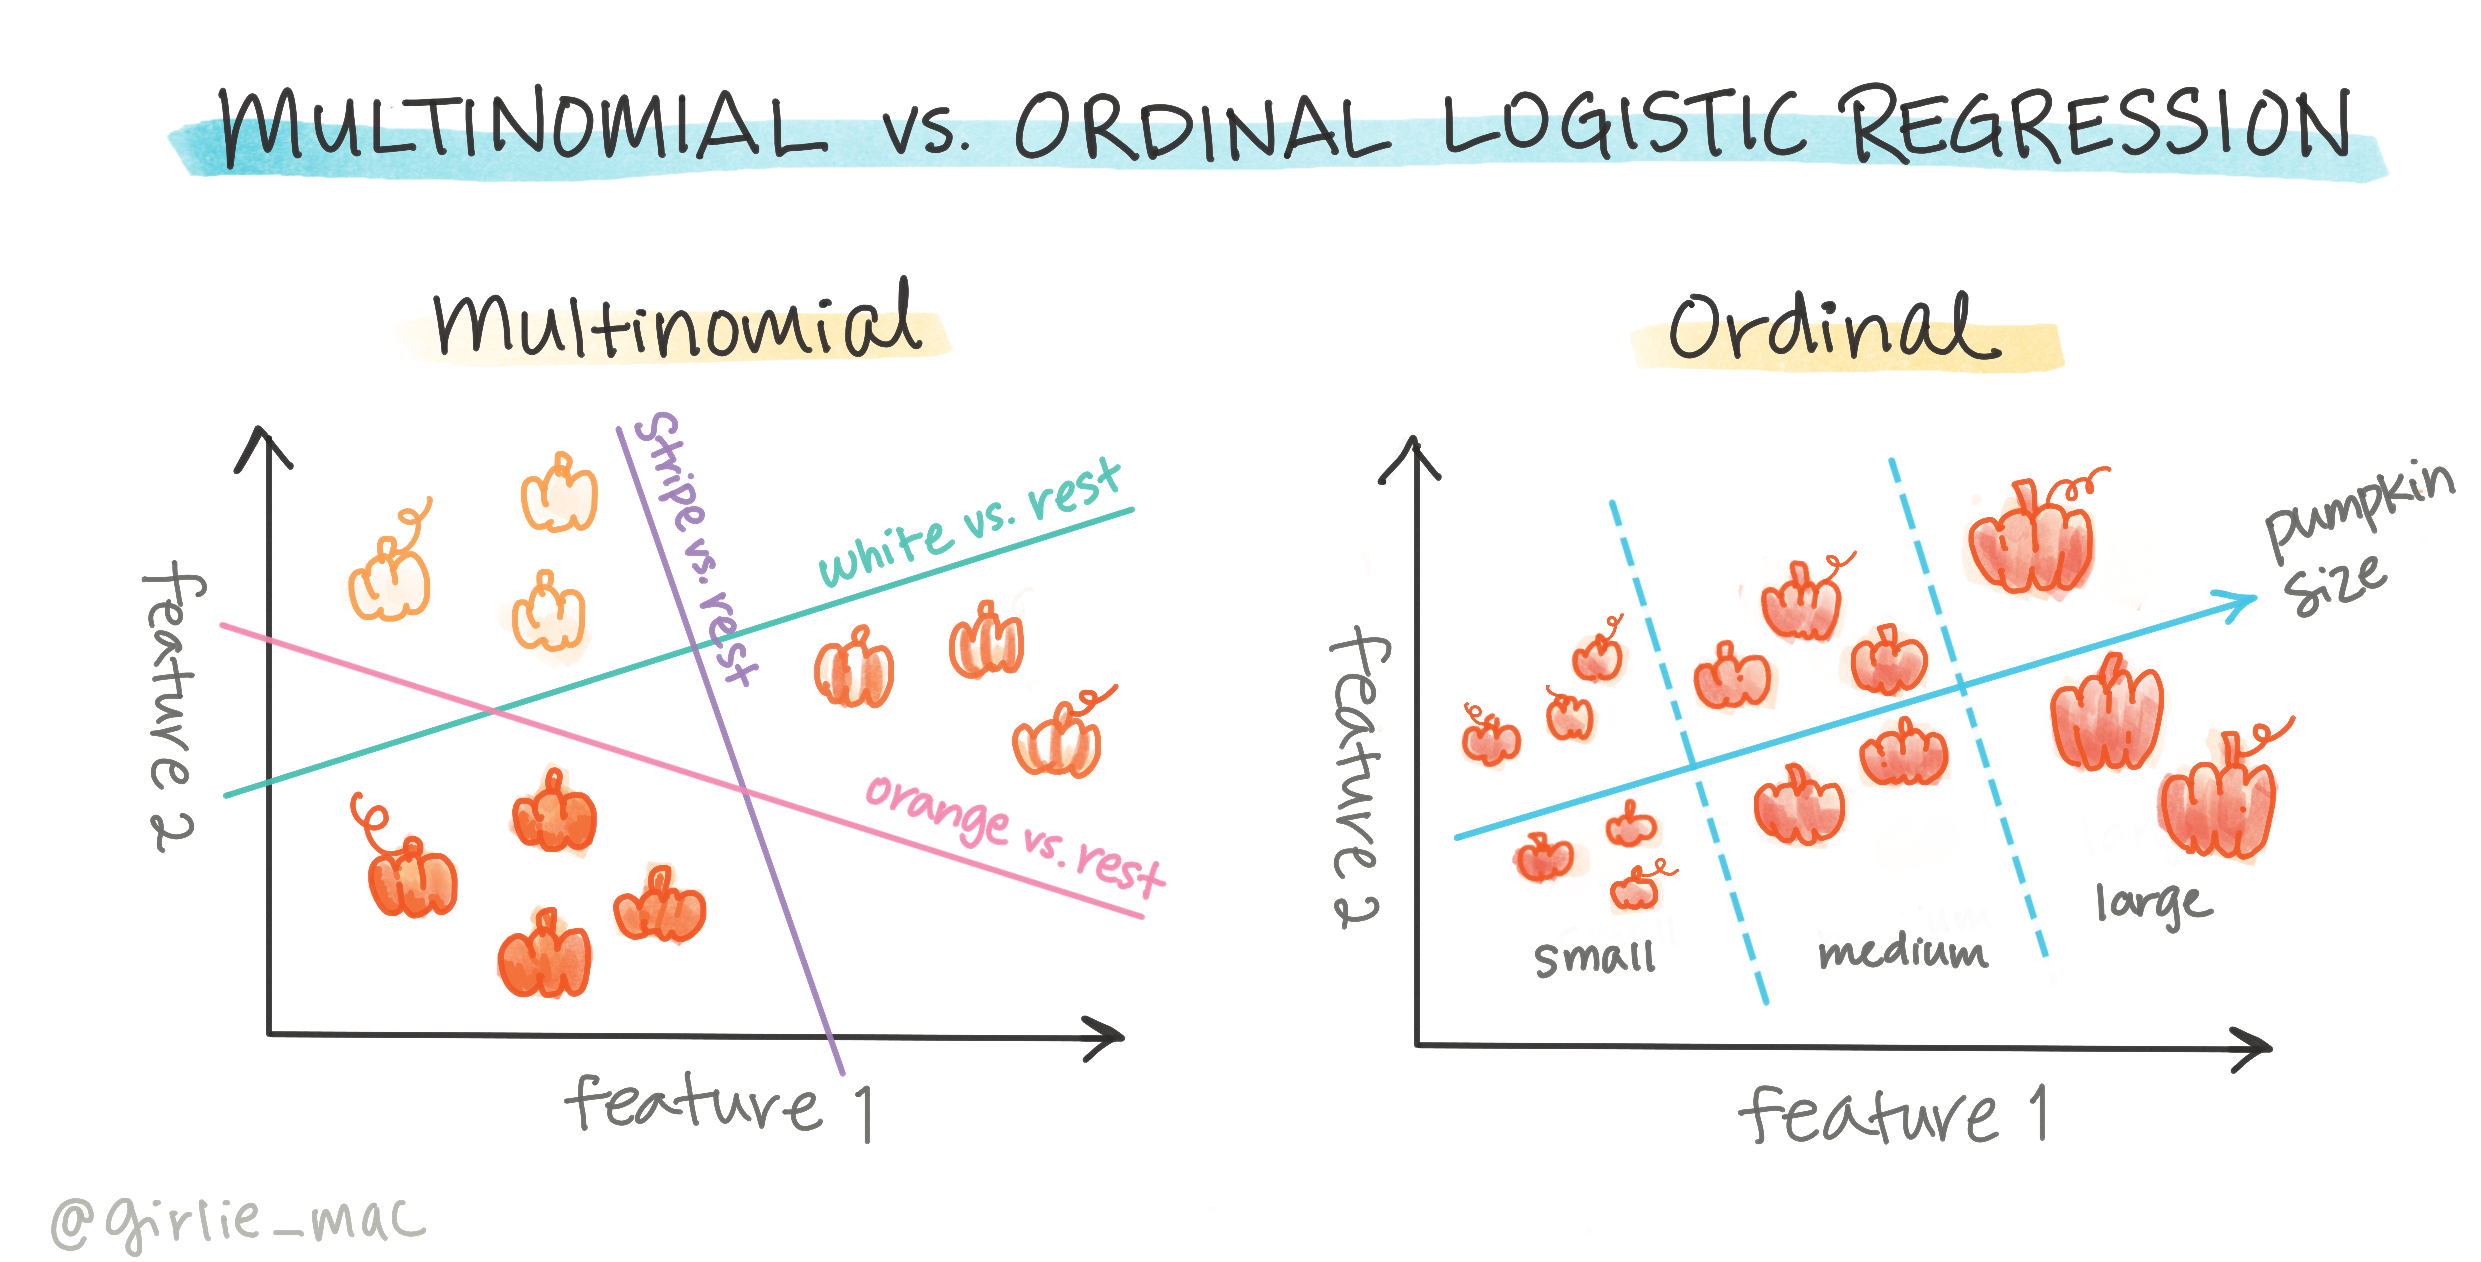

It's still linear

Even though this type of Regression is all about 'category predictions', it still works best when there is a clear linear relationship between the dependent variable (color) and the other independent variables (the rest of the dataset, like city name and size). It's good to get an idea of whether there is any linearity dividing these variables or not.

Variables DO NOT have to correlate

Remember how linear regression worked better with more correlated variables? Logistic regression is the opposite - the variables don't have to align. That works for this data which has somewhat weak correlations.

You need a lot of clean data

Logistic regression will give more accurate results if you use more data; our small dataset is not optimal for this task, so keep that in mind.

Exercise - tidy the data

First, clean the data a bit, dropping null values and selecting only some of the columns:

1 Add the following code:

In [3]:
import pandas as pd
pumpkins = pd.read_csv('../Week 04 _ Regression/Data/US-pumpkins.csv')
pumpkins.head()



,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)


In [5]:
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

Visualization - side-by-side grid

By now you have loaded up the starter notebook with pumpkin data once again and cleaned it so as to preserve a dataset containing a few variables, including Color. Let's visualize the dataframe in the notebook using a different library: Seaborn, which is built on Matplotlib which we used earlier.

Seaborn offers some neat ways to visualize your data. For example, you can compare distributions of the data for each point in a side-by-side grid.

Create such a grid by instantiating a PairGrid, using our pumpkin data new_pumpkins, followed by calling map():

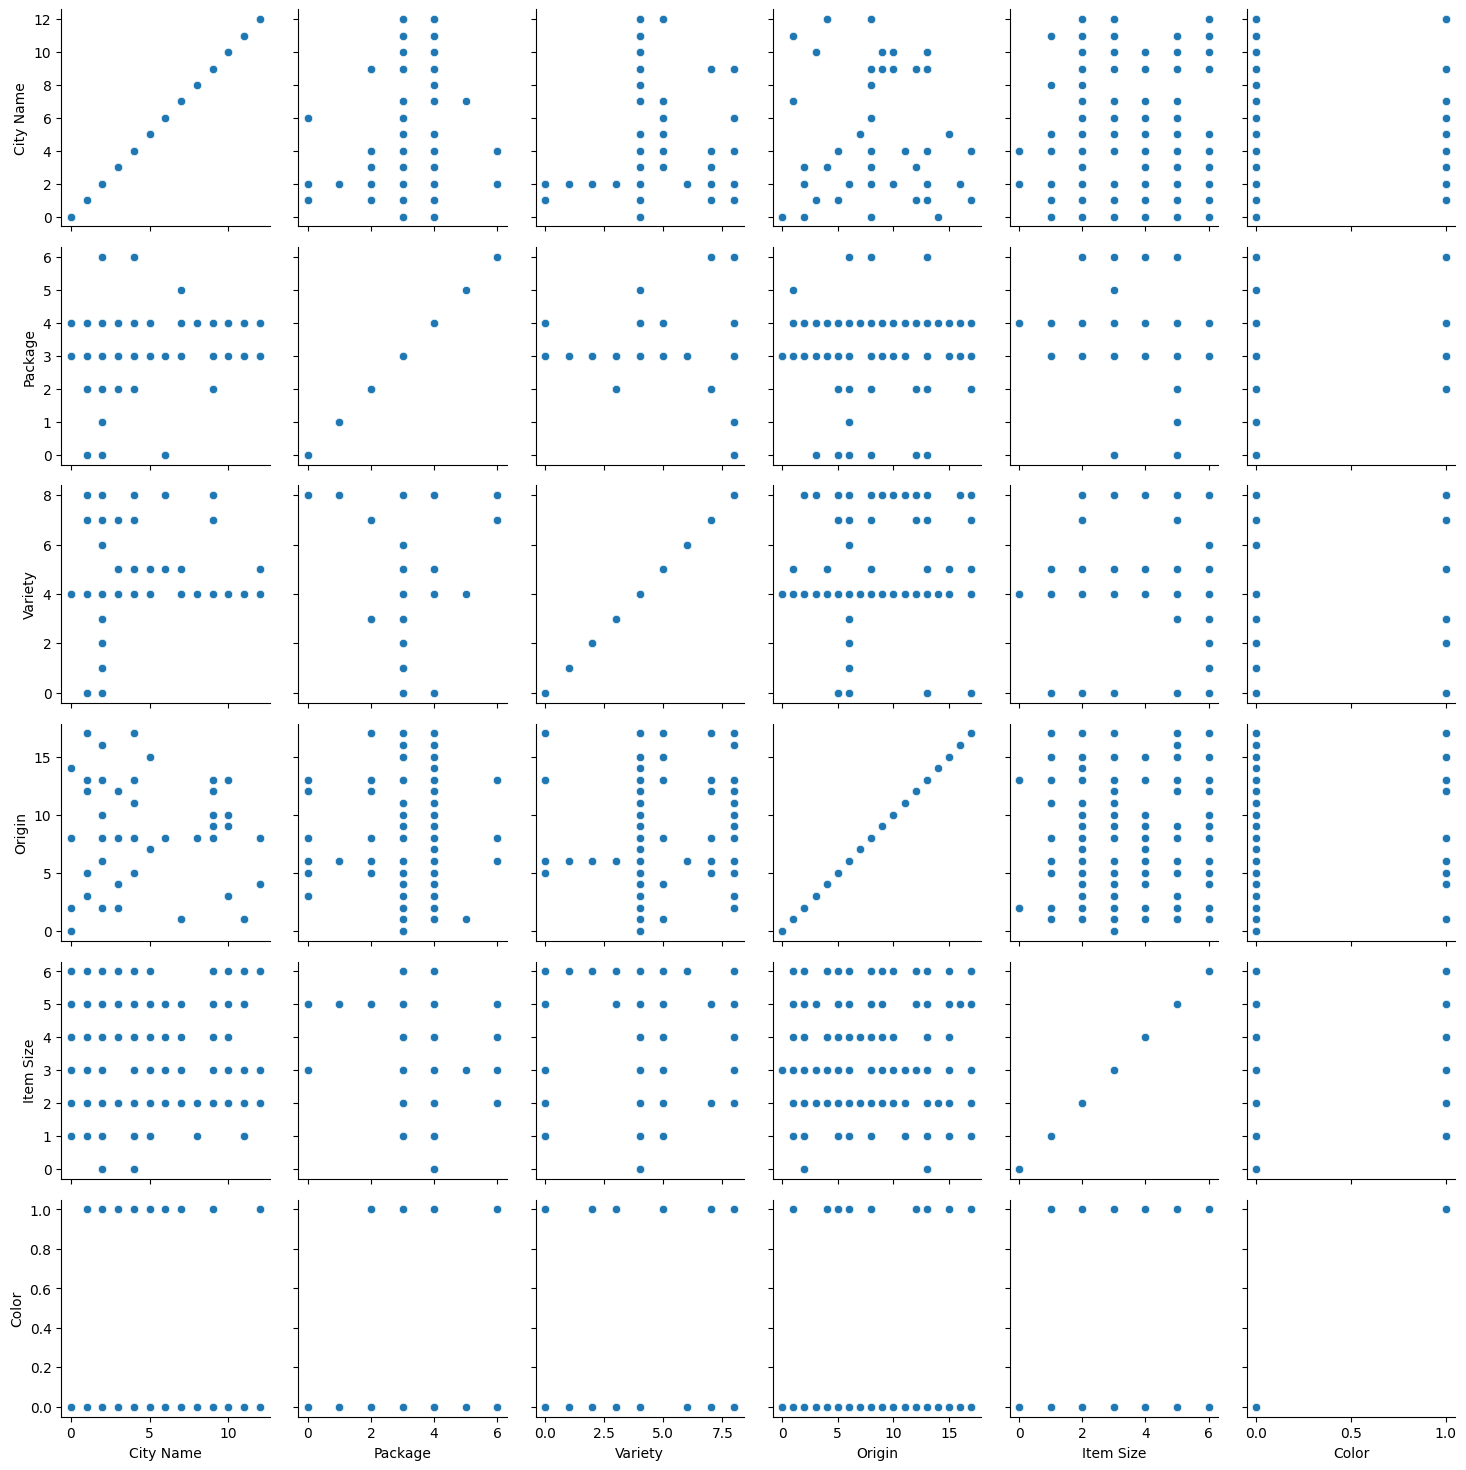

In [6]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

By observing data side-by-side, you can see how the Color data relates to the other columns.

By observing data side-by-side, you can see how the Color data relates to the other columns.

Since Color is a binary category (Orange or Not), it's called 'categorical data' and needs 'a more specialized approach to visualization'. There are other ways to visualize the relationship of this category with other variables.

You can visualize variables side-by-side with Seaborn plots.

1 Try a 'swarm' plot to show the distribution of values:

c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


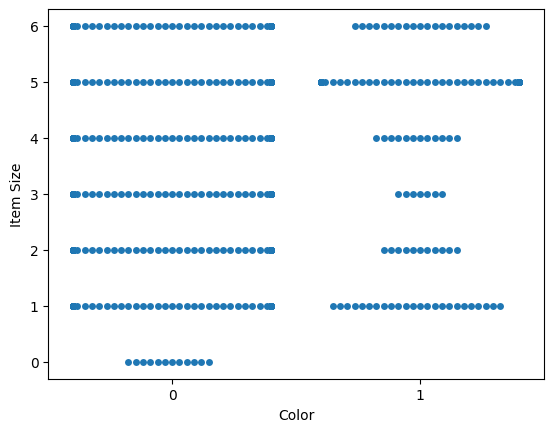

In [8]:
import seaborn as sns
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

Violin plot

A 'violin' type plot is useful as you can easily visualize the way that data in the two categories is distributed. Violin plots don't work so well with smaller datasets as the distribution is displayed more 'smoothly'.

1 As parameters x=Color, kind="violin" and call catplot():

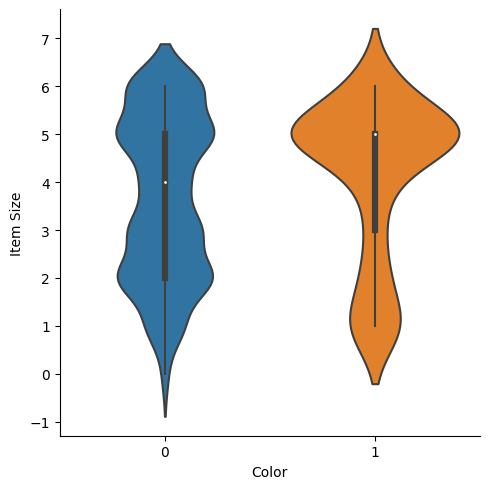

In [9]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

Now that we have an idea of the relationship between the binary categories of color and the larger group of sizes, let's explore logistic regression to determine a given pumpkin's likely color.

Show Me The Math

Remember how linear regression often used ordinary least squares to arrive at a value? Logistic regression relies on the concept of 'maximum likelihood' using sigmoid functions. A 'Sigmoid Function' on a plot looks like an 'S' shape. It takes a value and maps it to somewhere between 0 and 1. Its curve is also called a 'logistic curve'. Its formula looks like this:

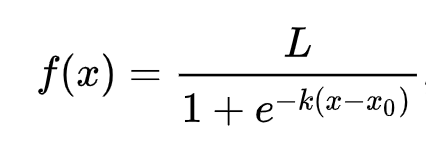

where the sigmoid's midpoint finds itself at x's 0 point, L is the curve's maximum value, and k is the curve's steepness. If the outcome of the function is more than 0.5, the label in question will be given the class '1' of the binary choice. If not, it will be classified as '0'.

Build your model

Building a model to find these binary classification is surprisingly straightforward in Scikit-learn.

1 Select the variables you want to use in your classification model and split the training and test sets calling 

train_test_split():

In [10]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


2 Now you can train your model, by calling fit() with your training data, and print out its result:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


Better comprehension via a confusion matrix

While you can get a scoreboard report terms by printing out the items above, you might be able to understand your model more easily by using a confusion matrix to help us understand how the model is performing.

A 'confusion matrix' (or 'error matrix') is a table that expresses your model's true vs. false positives and negatives, thus gauging the accuracy of predictions.

1 To use a confusion metrics, call confusion_matrix():

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

ake a look at your model's confusion matrix:

In [ ]:
array([[162,   4],
       [ 33,   0]])

In Scikit-learn, confusion matrices Rows (axis 0) are actual labels and columns (axis 1) are predicted labels.

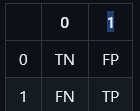

What's going on here? Let's say our model is asked to classify pumpkins between two binary categories, category 'orange' and category 'not-orange'.

What's going on here? Let's say our model is asked to classify pumpkins between two binary categories, category 'orange' and category 'not-orange'.


    If your model predicts a pumpkin as not orange and it belongs to category 'not-orange' in reality we call it a true negative, shown by the top left number.

    If your model predicts a pumpkin as orange and it belongs to category 'not-orange' in reality we call it a false negative, shown by the bottom left number.

    If your model predicts a pumpkin as not orange and it belongs to category 'orange' in reality we call it a false positive, shown by the top right number.
    
    If your model predicts a pumpkin as orange and it belongs to category 'orange' in reality we call it a true positive, shown by the bottom right number.


As you might have guessed it's preferable to have a larger number of true positives and true negatives and a lower number of false positives and false negatives, which implies that the model performs better.

How does the confusion matrix relate to precision and recall? Remember, the classification report printed above showed precision (0.83) and recall (0.98).

Precision = tp / (tp + fp) = 162 / (162 + 33) = 0.8307692307692308

Recall = tp / (tp + fn) = 162 / (162 + 4) = 0.9759036144578314

Q: According to the confusion matrix, how did the model do? A: Not too bad; there are a good number of true negatives but also several false negatives.

Visualize the ROC curve of this model

This is not a bad model; its accuracy is in the 80% range so ideally you could use it to predict the color of a pumpkin given a set of variables.

Let's do one more visualization to see the so-called 'ROC' score:

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

Using Seaborn again, plot the model's Receiving Operating Characteristic or ROC. ROC curves are often used to get a view of the output of a classifier in terms of its true vs. false positives. "ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis." Thus, the steepness of the curve and the space between the midpoint line and the curve matter: you want a curve that quickly heads up and over the line. In our case, there are false positives to start with, and then the line heads up and over properly:

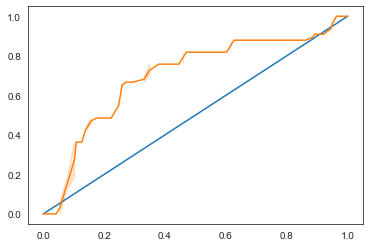

Finally, use Scikit-learn's roc_auc_score API to compute the actual 'Area Under the Curve' (AUC):

In [16]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748


The result is 0.6976998904709748. Given that the AUC ranges from 0 to 1, you want a big score, since a model that is 100% correct in its predictions will have an AUC of 1; in this case, the model is pretty good.